In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [137]:
df=pd.read_csv("C:/Users/Abinaya/OneDrive/Documents/credit card fraud/fraudTest.csv")
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,31-12-2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,13-02-1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,31-12-2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,27-12-1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,31-12-2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,29-11-1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,31-12-2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,15-12-1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [138]:
df.shape


(555719, 22)

In [139]:
df.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [141]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [142]:
df.describe(include = 'object')

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719
unique,226976,693,14,341,471,2,924,849,50,478,910,555719
top,15-12-2020 21:26,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,23-03-1977,2da90c7d74bd46a0caf3777415b3ebd3
freq,16,1859,56370,11443,12146,304886,1474,2423,40393,4119,2408,1


In [143]:
df=df.drop_duplicates()
df.shape

(555719, 22)

In [144]:
# Distribution of Dependent Variable

df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [145]:
df['is_fraud'].value_counts(normalize=True)*100

is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64

In [146]:
df1 = df.copy()
df1

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,31-12-2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,13-02-1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,31-12-2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,27-12-1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,31-12-2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,29-11-1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,31-12-2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,15-12-1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [147]:
df1.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [148]:
# Convert the 'trans_date_trans_time' column to datetime format
df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'])

# Now you can extract the hour, day of the week, and year-month
df1['trans_hour'] = df1['trans_date_trans_time'].dt.hour
df1['day_of_week'] = df1['trans_date_trans_time'].dt.dayofweek
df1['year_month'] = df1['trans_date_trans_time'].dt.to_period('M')

In [149]:
df1['trans_date_trans_time'].dtype

dtype('<M8[ns]')

In [150]:
df1.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month
0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,6,2020-06
1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,6,2020-06
2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,6,2020-06
3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,6,2020-06
4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,6,2020-06


In [151]:
df['dob'] = pd.to_datetime(df['dob'])

In [152]:
import pandas as pd

# Convert the columns to datetime format
df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'])
df1['dob'] = pd.to_datetime(df1['dob'])

# Calculate age
df1['age'] = df1['trans_date_trans_time'].dt.year - df1['dob'].dt.year

In [153]:
df1['age'].describe()

count    555719.000000
mean         46.636237
std          17.418528
min          15.000000
25%          33.000000
50%          45.000000
75%          58.000000
max          96.000000
Name: age, dtype: float64

In [154]:
df.state.value_counts()

state
TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
KY    12506
VA    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: count, dtype: int64

In [157]:
df.job.value_counts()

job
Film/video editor                4119
Exhibition designer              3968
Surveyor, land/geomatics         3756
Naval architect                  3750
Designer, ceramics/pottery       3463
                                 ... 
Estate manager/land agent         195
Engineer, civil (consulting)      194
Operational investment banker      11
Software engineer                  11
Engineer, water                     8
Name: count, Length: 478, dtype: int64

In [186]:
pd.concat(
[df1['amt'].describe(percentiles = [0.5,0.95,0.999]).reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amount Distribution'}),
 
df1.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amount Distribution'}),

df1.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Fraud Amount Distribution'})],
axis=1
)

,Row Type,Overall Amount Distribution,Non Fraud Amount Distribution,Fraud Amount Distribution
0,count,555719.000000,553574.000000,2145.000000
1,mean,69.392810,67.614408,528.356494
2,std,156.745941,152.471931,392.747594
3,min,1.000000,1.000000,1.780000
4,50%,47.290000,47.150000,371.940000
5,95%,193.051000,188.870000,1084.108000
6,99.9%,1572.723500,1575.960200,1311.443760
7,max,22768.110000,22768.110000,1320.920000


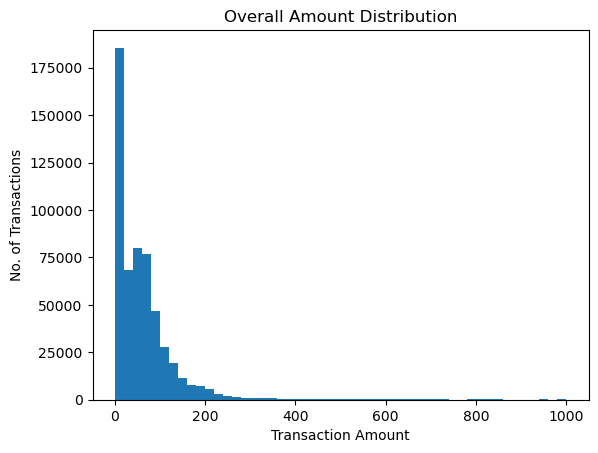

In [187]:
plt.hist(df1[df1['amt']<=1000]['amt'], bins=50)
plt.title('Overall Amount Distribution');

plt.xlabel('Transaction Amount')
plt.ylabel('No. of Transactions')

plt.show()

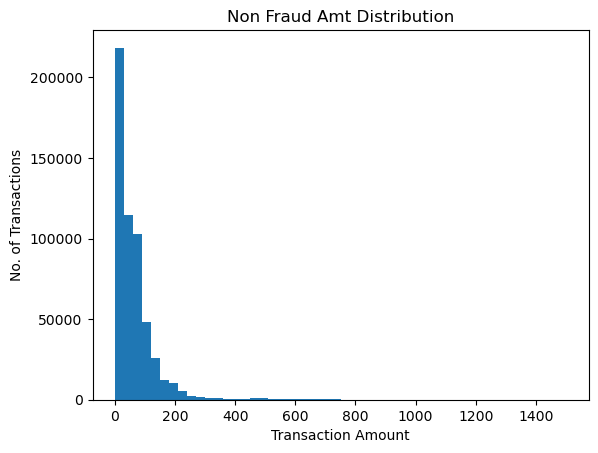

In [188]:
plt.hist(df1[(df1['is_fraud']==0) & (df1['amt']<=1500)]['amt'], bins=50)
plt.title('Non Fraud Amt Distribution');

plt.xlabel('Transaction Amount')
plt.ylabel('No. of Transactions')

plt.show()

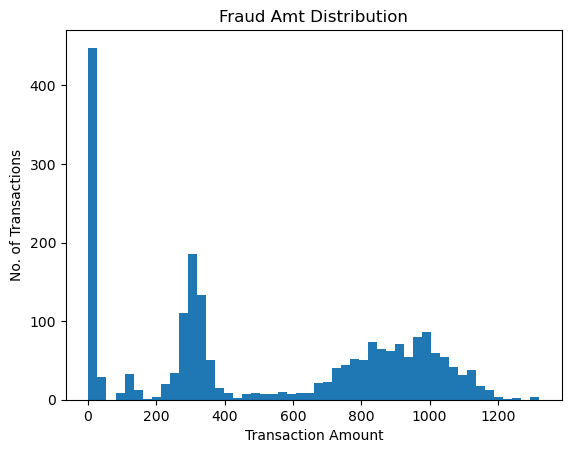

In [189]:
plt.hist(df1[(df1['is_fraud']==1) & (df1['amt']<=1500)]['amt'], bins=50)
plt.title('Fraud Amt Distribution')

plt.xlabel('Transaction Amount')
plt.ylabel('No. of Transactions')

plt.show()

<Axes: ylabel='amt'>

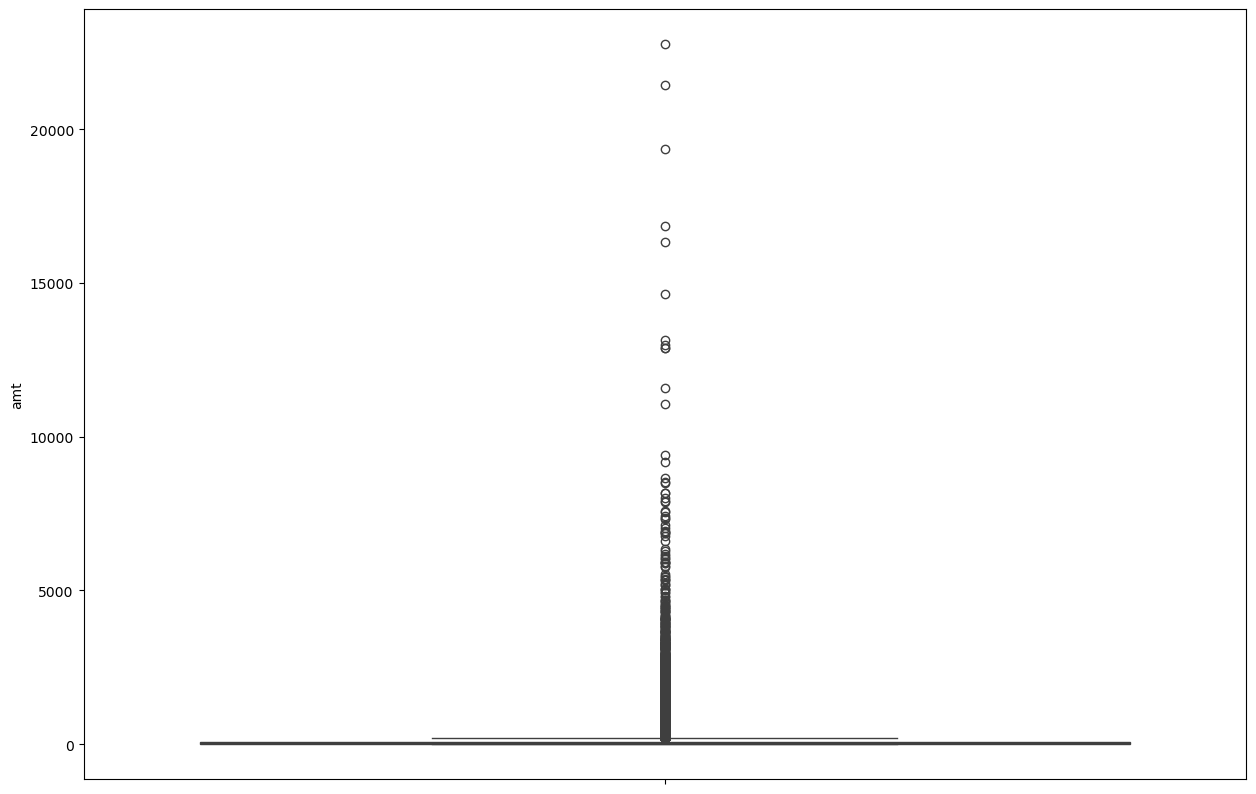

In [190]:
plt.figure(figsize=[15,10])
sns.boxplot(df1['amt'])

In [191]:

num_df1 = df1.select_dtypes(include=np.number)
num_df1

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,age
0,2.86,33.9659,-80.9355,333497,33.986391,-81.200714,0,12,6,52
1,29.84,40.3207,-110.4360,302,39.450498,-109.960431,0,12,6,30
2,41.28,40.6729,-73.5365,34496,40.495810,-74.196111,0,12,6,50
3,60.05,28.5697,-80.8191,54767,28.812398,-80.883061,0,12,6,33
4,3.19,44.2529,-85.0170,1126,44.959148,-85.884734,0,12,6,65
...,...,...,...,...,...,...,...,...,...,...
555714,43.77,40.4931,-91.8912,519,39.946837,-91.333331,0,23,3,54
555715,111.84,29.0393,-95.4401,28739,29.661049,-96.186633,0,23,3,21
555716,86.88,46.1966,-118.9017,3684,46.658340,-119.715054,0,23,3,39
555717,7.99,44.6255,-116.4493,129,44.470525,-117.080888,0,23,3,55


In [192]:
Q1 = num_df1.quantile(0.25)
Q3 = num_df1.quantile(0.75)

IQR = Q3 - Q1

find_outliers = ((num_df1 < (Q1 - 1.5*IQR)) | (num_df1 > (Q3 + 1.5*IQR))).any(axis = 1)

print(num_df1.shape)
print(num_df1[~find_outliers].shape)

num_df1 = num_df1[~find_outliers]
num_df1


(555719, 10)
(414892, 10)


,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,age
1,29.84,40.3207,-110.4360,302,39.450498,-109.960431,0,12,6,30
2,41.28,40.6729,-73.5365,34496,40.495810,-74.196111,0,12,6,50
4,3.19,44.2529,-85.0170,1126,44.959148,-85.884734,0,12,6,65
5,19.55,42.1939,-76.7361,520,41.747157,-77.584197,0,12,6,29
7,10.37,43.7557,-97.5936,343,44.495498,-97.728453,0,12,6,48
...,...,...,...,...,...,...,...,...,...,...
555713,17.00,32.6176,-86.9475,1412,32.164145,-87.539669,0,23,3,50
555714,43.77,40.4931,-91.8912,519,39.946837,-91.333331,0,23,3,54
555715,111.84,29.0393,-95.4401,28739,29.661049,-96.186633,0,23,3,21
555716,86.88,46.1966,-118.9017,3684,46.658340,-119.715054,0,23,3,39


In [193]:
num_df1.std()


amt              43.703226
lat               4.598659
long             11.450744
city_pop       8745.988294
merch_lat         4.635616
merch_long       11.463449
is_fraud          0.000000
trans_hour        6.803565
day_of_week       2.178602
age              17.640610
dtype: float64

gender
F    69.388905
M    69.397558
Name: amt, dtype: float64


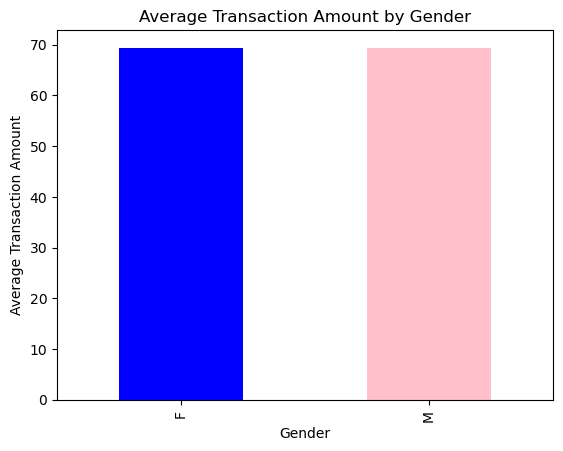

gender
F    304886
M    250833
Name: count, dtype: int64


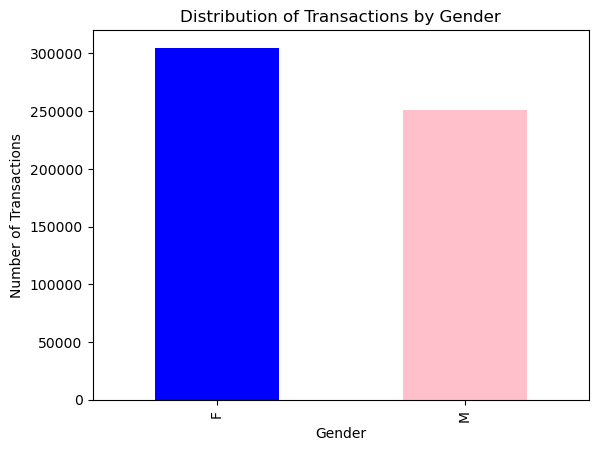

In [194]:
# Distribution of Transactions by Gender
import pandas as pd

# Count transactions by gender# Calculate average transaction amount by gender
avg_amt_by_gender = df1.groupby('gender')['amt'].mean()
print(avg_amt_by_gender)

# Plot the average amount
avg_amt_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Average Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Transaction Amount')
plt.show()
gender_counts = df1['gender'].value_counts()
print(gender_counts)

# Plot the distribution
import matplotlib.pyplot as plt

gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribution of Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show()

In [195]:
# Calculate correlation between age and amount for each gender
correlation_by_gender = df1.groupby('gender').apply(lambda x: x[['age', 'amt']].corr().iloc[0, 1])
print(correlation_by_gender)


gender
F   -0.013335
M   -0.012316
dtype: float64


In [196]:
pd.crosstab(df1['gender'], df1['is_fraud'])

is_fraud,0,1
gender,,
F,303722,1164
M,249852,981


category
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: count, dtype: int64


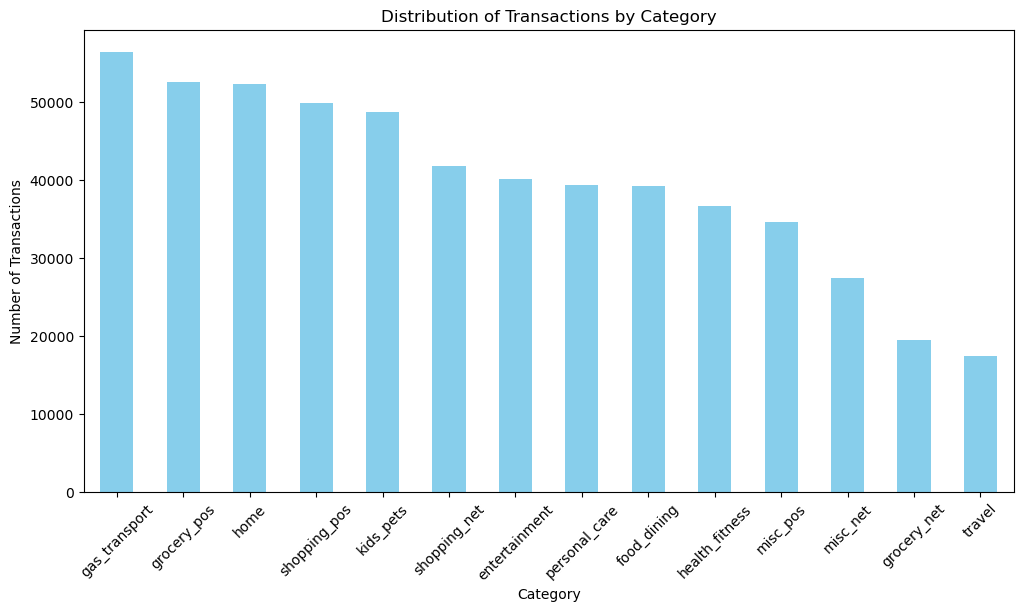

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Count transactions by category
category_counts = df1['category'].value_counts()
print(category_counts)

# Plot the distribution
category_counts.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Distribution of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [198]:
num_df1 = df1.select_dtypes(include=np.number)
num_df1

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,age
0,2.86,33.9659,-80.9355,333497,33.986391,-81.200714,0,12,6,52
1,29.84,40.3207,-110.4360,302,39.450498,-109.960431,0,12,6,30
2,41.28,40.6729,-73.5365,34496,40.495810,-74.196111,0,12,6,50
3,60.05,28.5697,-80.8191,54767,28.812398,-80.883061,0,12,6,33
4,3.19,44.2529,-85.0170,1126,44.959148,-85.884734,0,12,6,65
...,...,...,...,...,...,...,...,...,...,...
555714,43.77,40.4931,-91.8912,519,39.946837,-91.333331,0,23,3,54
555715,111.84,29.0393,-95.4401,28739,29.661049,-96.186633,0,23,3,21
555716,86.88,46.1966,-118.9017,3684,46.658340,-119.715054,0,23,3,39
555717,7.99,44.6255,-116.4493,129,44.470525,-117.080888,0,23,3,55


In [199]:
cat_df1 = df1.select_dtypes(include = 'object')
cat_df1


,merchant,category,gender
0,fraud_Kirlin and Sons,personal_care,M
1,fraud_Sporer-Keebler,personal_care,F
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,F
3,fraud_Haley Group,misc_pos,M
4,fraud_Johnston-Casper,travel,M
...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,M
555715,fraud_Hoppe-Parisian,kids_pets,M
555716,fraud_Rau-Robel,kids_pets,F
555717,fraud_Breitenberg LLC,travel,M


In [200]:
category_onehot = pd.get_dummies(cat_df1.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(cat_df1.gender, prefix='gender', drop_first=True)
ohe_df1 = pd.concat([category_onehot,gender_onehot], axis = 1).astype(int)
ohe_df1

,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0,0,0,0,1,0,0,0,0,0,0,0,0,1
555715,0,0,0,0,0,0,1,0,0,0,0,0,0,1
555716,0,0,0,0,0,0,1,0,0,0,0,0,0,0
555717,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [201]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [204]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the 'amt' and 'city_pop' columns
num_df1[['amt', 'city_pop']] = scaler.fit_transform(num_df1[['amt', 'city_pop']])

# Debug: print the first few rows of the DataFrame to see the result
print(num_df1.head())


        amt      lat      long  city_pop  merch_lat  merch_long  is_fraud  \
0  0.000082  33.9659  -80.9355  0.114727  33.986391  -81.200714         0   
1  0.001267  40.3207 -110.4360  0.000096  39.450498 -109.960431         0   
2  0.001769  40.6729  -73.5365  0.011860  40.495810  -74.196111         0   
3  0.002594  28.5697  -80.8191  0.018834  28.812398  -80.883061         0   
4  0.000096  44.2529  -85.0170  0.000379  44.959148  -85.884734         0   

   trans_hour  day_of_week  age  
0          12            6   52  
1          12            6   30  
2          12            6   50  
3          12            6   33  
4          12            6   65  


In [205]:
enc_df1 = pd.concat([num_df1,cat_df_enc], axis=1)
enc_df1

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,age,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0.000082,33.9659,-80.9355,0.114727,33.986391,-81.200714,0,12,6,52,...,0,0,0,0,0,1,0,0,0,1
1,0.001267,40.3207,-110.4360,0.000096,39.450498,-109.960431,0,12,6,30,...,0,0,0,0,0,1,0,0,0,0
2,0.001769,40.6729,-73.5365,0.011860,40.495810,-74.196111,0,12,6,50,...,1,0,0,0,0,0,0,0,0,0
3,0.002594,28.5697,-80.8191,0.018834,28.812398,-80.883061,0,12,6,33,...,0,0,0,0,1,0,0,0,0,1
4,0.000096,44.2529,-85.0170,0.000379,44.959148,-85.884734,0,12,6,65,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.001879,40.4931,-91.8912,0.000171,39.946837,-91.333331,0,23,3,54,...,1,0,0,0,0,0,0,0,0,1
555715,0.004868,29.0393,-95.4401,0.009879,29.661049,-96.186633,0,23,3,21,...,0,0,1,0,0,0,0,0,0,1
555716,0.003772,46.1966,-118.9017,0.001260,46.658340,-119.715054,0,23,3,39,...,0,0,1,0,0,0,0,0,0,0
555717,0.000307,44.6255,-116.4493,0.000036,44.470525,-117.080888,0,23,3,55,...,0,0,0,0,0,0,0,0,1,1


In [206]:
df_final=enc_df1.copy()

In [207]:
df_final.head()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,age,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0.000082,33.9659,-80.9355,0.114727,33.986391,-81.200714,0,12,6,52,...,0,0,0,0,0,1,0,0,0,1
1,0.001267,40.3207,-110.4360,0.000096,39.450498,-109.960431,0,12,6,30,...,0,0,0,0,0,1,0,0,0,0
2,0.001769,40.6729,-73.5365,0.011860,40.495810,-74.196111,0,12,6,50,...,1,0,0,0,0,0,0,0,0,0
3,0.002594,28.5697,-80.8191,0.018834,28.812398,-80.883061,0,12,6,33,...,0,0,0,0,1,0,0,0,0,1
4,0.000096,44.2529,-85.0170,0.000379,44.959148,-85.884734,0,12,6,65,...,0,0,0,0,0,0,0,0,1,1


In [208]:

x=df_final.drop('is_fraud',axis=1)
y=df_final.is_fraud

In [209]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)


In [210]:
print("Shape of input after applying SMOTE",x_resampled.shape)
print("Shape of output after applying SMOTE",y_resampled.shape)

Shape of input after applying SMOTE (1107148, 24)
Shape of output after applying SMOTE (1107148,)


In [211]:
x_resampled.head()

,amt,lat,long,city_pop,merch_lat,merch_long,trans_hour,day_of_week,age,merchant_encoded,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0.000082,33.9659,-80.9355,0.114727,33.986391,-81.200714,12,6,52,319,...,0,0,0,0,0,1,0,0,0,1
1,0.001267,40.3207,-110.4360,0.000096,39.450498,-109.960431,12,6,30,591,...,0,0,0,0,0,1,0,0,0,0
2,0.001769,40.6729,-73.5365,0.011860,40.495810,-74.196111,12,6,50,611,...,1,0,0,0,0,0,0,0,0,0
3,0.002594,28.5697,-80.8191,0.018834,28.812398,-80.883061,12,6,33,222,...,0,0,0,0,1,0,0,0,0,1
4,0.000096,44.2529,-85.0170,0.000379,44.959148,-85.884734,12,6,65,292,...,0,0,0,0,0,0,0,0,1,1


In [212]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (885718, 24)
X_test shape: (221430, 24)
y_train shape: (885718,)
y_test shape: (221430,)


In [213]:
from sklearn.linear_model import LogisticRegression

In [214]:
logreg = LogisticRegression() 

logreg.fit(X_train, y_train)

LogisticRegression()

In [215]:
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(estimator=LogisticRegression(),X=x_resampled,y=y_resampled,cv=5)

cross_val

array([0.84069909, 0.82495145, 0.82914239, 0.84214805, 0.83444806])

In [216]:

np.average(cross_val)

0.8342778093267487

In [217]:
from sklearn.model_selection import GridSearchCV

In [218]:
grid_search=GridSearchCV(logreg,param_grid={
    'C':[1,5],
    'penalty':['l1', 'l2', 'elasticnet']
},cv=5,return_train_score=False)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5], 'penalty': ['l1', 'l2', 'elasticnet']})

In [219]:

grid_search.best_score_

0.8241889686323598

In [220]:
grid_search.best_params_


{'C': 5, 'penalty': 'l2'}

In [221]:

logreg.score(X_train,y_train)

0.7432026897951718

In [222]:
logreg.score(X_test,y_test)

0.7440229417874723

In [223]:
from sklearn.metrics import confusion_matrix

In [224]:
y_pred=logreg.predict(X_test)
y_test=np.array(y_test)

In [225]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[77739, 32683],
       [23998, 87010]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

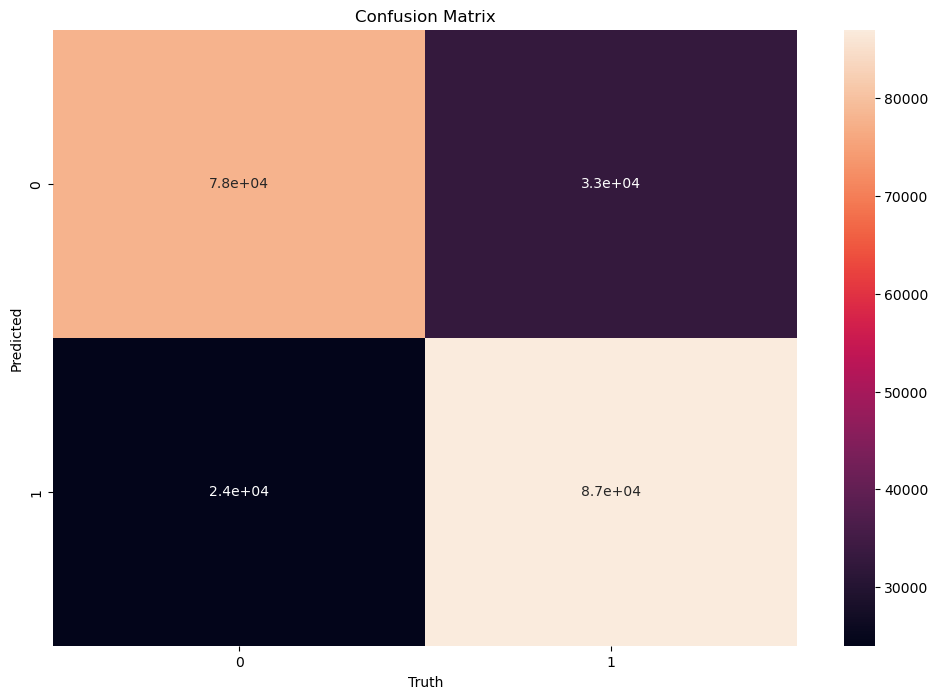

In [226]:
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

In [227]:
from sklearn.metrics import classification_report 

In [228]:
cls_report=classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.76      0.70      0.73    110422
           1       0.73      0.78      0.75    111008

    accuracy                           0.74    221430
   macro avg       0.75      0.74      0.74    221430
weighted avg       0.75      0.74      0.74    221430



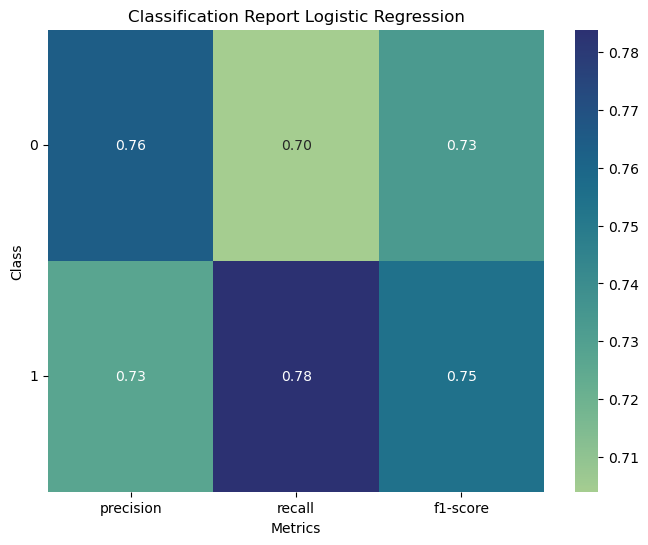

In [229]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

class_metrics = df_report.drop(['accuracy', 'macro avg', 'weighted avg'])

plt.figure(figsize=(8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot=True, cmap="crest", fmt=".2f")
plt.title('Classification Report Logistic Regression')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.yticks(rotation=0)
plt.show()

In [230]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

In [231]:
auc_roc=roc_auc_score(y_test,y_pred)
auc_roc

0.7439173489605189

In [232]:
y_prob = logreg.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8156859815587372

Text(0.5, 0, 'False Positive Rate')

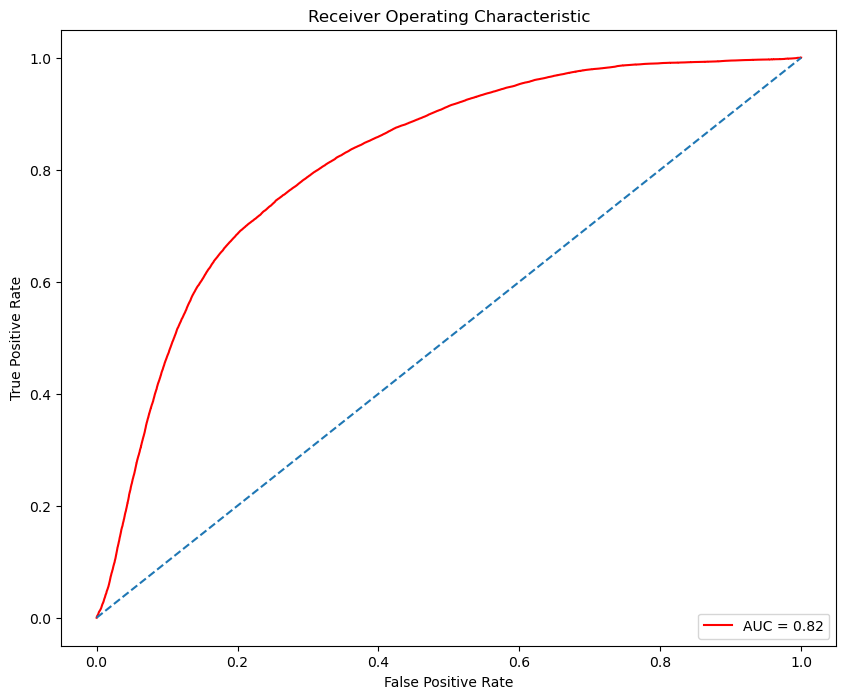

In [233]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [234]:
from sklearn.ensemble import RandomForestClassifier


In [238]:
rf_model = RandomForestClassifier(random_state=42)


In [253]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [254]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=3)



In [251]:
np.average(cross_val)

0.8342778093267487

In [ ]:
grid_search=GridSearchCV(logreg,param_grid={
'criterion':['gini', 'entropy', 'log_loss']
},cv=5,return_train_score=False)

grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_scores_

In [ ]:
y_pred=rf_model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

Text(0.5, 1.0, 'Confusion Matrix')

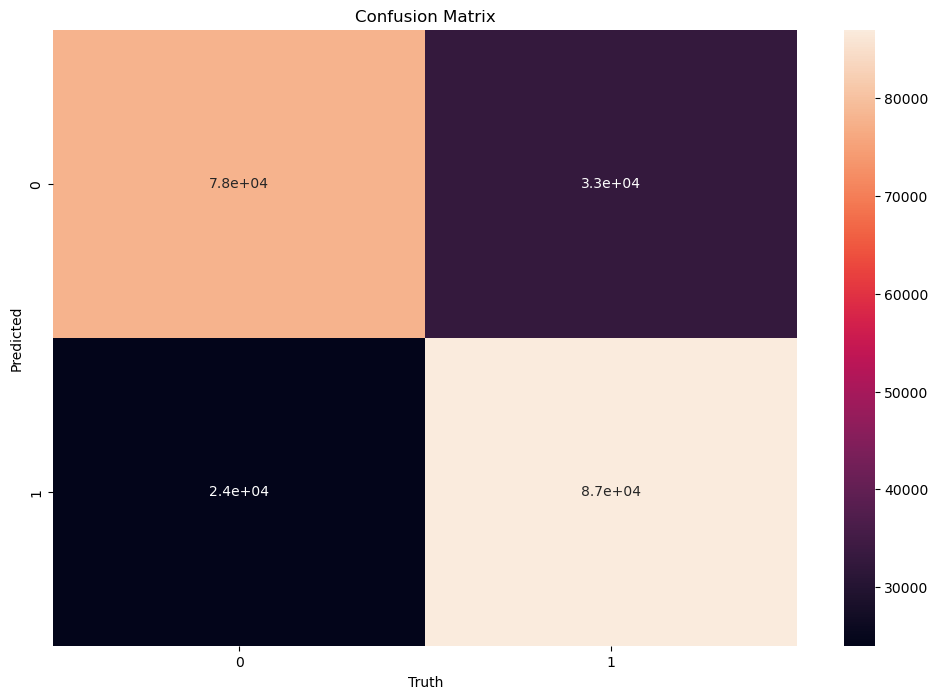

In [260]:
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

In [261]:
cls_rep=classification_report(y_test,y_pred)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.76      0.70      0.73    110422
           1       0.73      0.78      0.75    111008

    accuracy                           0.74    221430
   macro avg       0.75      0.74      0.74    221430
weighted avg       0.75      0.74      0.74    221430



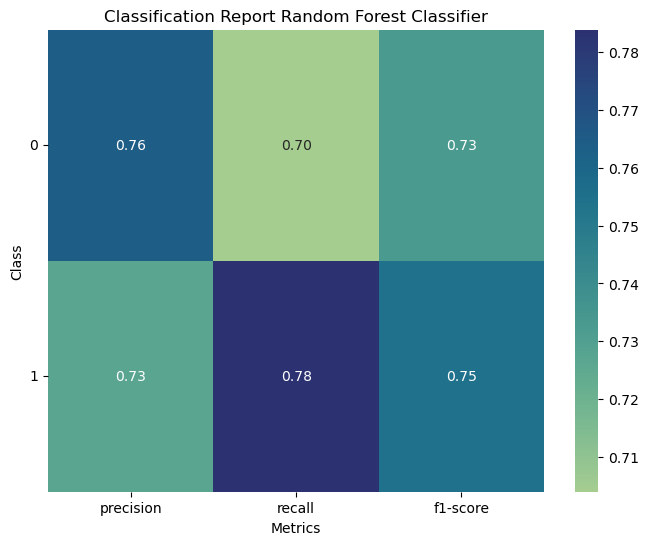

In [263]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

class_metrics = df_report.drop(['accuracy', 'macro avg', 'weighted avg'])

plt.figure(figsize=(8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot=True, cmap="crest", fmt=".2f")
plt.title('Classification Report Random Forest Classifier')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.yticks(rotation=0)
plt.show()

In [264]:
auc_roc=roc_auc_score(y_test,y_pred)
auc_roc

0.7439173489605189

In [265]:
auc_roc=roc_auc_score(y_test,y_pred)
auc_roc

0.7439173489605189

Text(0.5, 0, 'False Positive Rate')

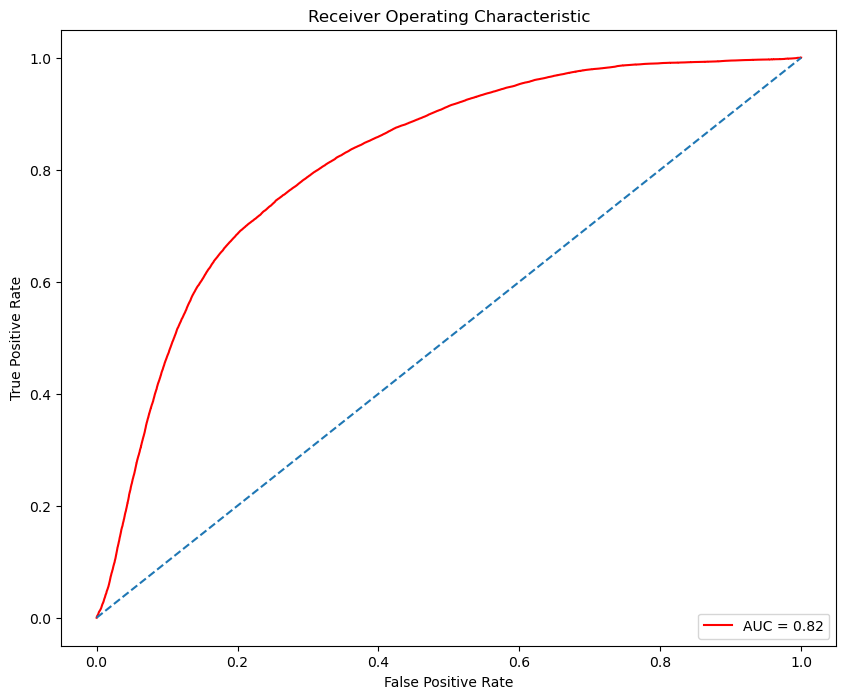

In [266]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')